# The loan company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the loan csv file for analysis.
loan = pd.read_csv('loan.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Looks like this is a complex data set.

In [4]:
## Lets look at the column names and see if those match with the data dictionay provided.
loan.columns[:56]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint'],
   

In [5]:
loan.columns[56:]

Index(['acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankru

### Comparison against the data columns as per the data dictionary provided.
####The following are not present in the dataset. 
1. fico_range_high 
2. fico_range_low 
3. last_fico_range_high 
4. last_fico_range_low

####The following column are named differently in the data dictionary
1. verified_status_joint => verification_status_joint

#### Igonring these differences.

In [6]:
## Lets us look at the column data.
loan.iloc[:,:20].head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...


In [7]:
loan.iloc[:,20:40].head(5)

,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv
0,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84
1,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71
2,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67
3,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89
4,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33


In [8]:
loan.iloc[:,40:60].head(5)

,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m
0,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
1,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
3,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN


In [9]:
loan.iloc[:,60:80].head(5)

,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [10]:
loan.iloc[:,80:].head(5)

,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Some columns have too many NaN. Lets check those.

In [11]:
## Get list of columns which has any NAs
loan.columns[loan.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

In [12]:
## Get list of columns which has all NAs
loan.columns[loan.isna().all()].tolist()

## wow! this is a big list and not useful for us.

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [13]:
## Just checking
loan['num_bc_tl'].unique()

array([nan])

In [14]:
len(loan.columns[loan.isna().all()].tolist())

54

In [15]:
len(loan.columns)

111

In [16]:
## Lets drop all those 54 columns having only na; not useful
loan.dropna(how = 'all', axis = 1, inplace = True)

In [17]:
# The new number of columns is 57
len(loan.columns)

57

In [18]:
## Lets see how many have all na
len(loan.columns[loan.isna().all()].tolist())
### Its 0 now. We have got some cleanup done.

0

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### We have no rows with all na

### The following columns have only very few non-null values
1. mths_since_last_delinq
2. mths_since_last_record
3. next_pymnt_d

In [20]:
loan['mths_since_last_delinq'].describe()
##The number of months since the borrower's last delinquency.

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [21]:
loan[['mths_since_last_delinq', "loan_status"]].groupby(by='loan_status').count()

,mths_since_last_delinq
loan_status,
Charged Off,2142
Current,363
Fully Paid,11530


In [22]:
loan[['mths_since_last_delinq', "loan_status"]].groupby(by='loan_status').median()

,mths_since_last_delinq
loan_status,
Charged Off,34.0
Current,34.0
Fully Paid,34.0


In [23]:
loan[['mths_since_last_delinq', "loan_status"]].groupby(by='loan_status').mean()

,mths_since_last_delinq
loan_status,
Charged Off,36.157330
Current,36.595041
Fully Paid,35.831483


In [24]:
##### mths_since_last_delinq does not seem to having any impact of the loan status.
## Lets delete this column
del loan['mths_since_last_delinq']

In [25]:
loan['mths_since_last_record'].describe()
## The number of months since the last public record.

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [26]:
loan[['mths_since_last_record', "loan_status"]].groupby(by='loan_status').count()

,mths_since_last_record
loan_status,
Charged Off,578
Current,46
Fully Paid,2162


In [27]:
loan[['mths_since_last_record', "loan_status"]].groupby(by='loan_status').median()

,mths_since_last_record
loan_status,
Charged Off,92.0
Current,101.0
Fully Paid,89.0


In [28]:
loan[['mths_since_last_record', "loan_status"]].groupby(by='loan_status').mean()

,mths_since_last_record
loan_status,
Charged Off,74.679931
Current,95.739130
Fully Paid,67.812211


In [29]:
loan['mths_since_last_record'].isnull().sum()

36931

In [30]:
(loan['mths_since_last_record'].count() / len(loan['mths_since_last_record']))*100

7.0146284966135415

In [31]:
## A small %ge of data is available for mths_since_last_record. Lets drop these
del loan['mths_since_last_record']

In [32]:
loan['next_pymnt_d'].describe()
## Next scheduled payment date

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In [33]:
loan['next_pymnt_d'].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [34]:
loan[['next_pymnt_d', "loan_amnt"]].groupby(by='next_pymnt_d').count()
## There are only 2 values for the next payment date
## this column wont be useful for us, this indicates the loan tenure was not over for these cases.

,loan_amnt
next_pymnt_d,
Jul-16,15
Jun-16,1125


In [35]:
## Lets drop column next_pymnt_d
del loan['next_pymnt_d']

In [36]:
len(loan.columns)

54

In [37]:
# we have data for 39717 applications
len(loan)

39717

In [38]:
### Indicates whether the loan is an individual application or a joint application with two co-borrowers
loan['application_type'].describe()

count          39717
unique             1
top       INDIVIDUAL
freq           39717
Name: application_type, dtype: object

In [39]:
## We see only one value for this. So this column is not very useful for us.
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [40]:
del loan['application_type']

In [41]:
len(loan.columns)

53

In [42]:
## loan_status	Current status of the loan
loan['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [43]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [44]:
loan[['loan_status', "loan_amnt"]].groupby(by='loan_status').count()

,loan_amnt
loan_status,
Charged Off,5627
Current,1140
Fully Paid,32950


In [45]:
## We have 1140 entries with loan status as Current. We dont need those for this analysis.
# Lets remove those.
loan = loan[loan['loan_status'] != 'Current']
len(loan)

38577

In [46]:
39717-1140

38577

#### We now have 38577 records in the load dataset.

In [47]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

#### Lets check the remaining columns left in the loan dataset.

In [48]:
loan['verification_status'].describe()

count            38577
unique               3
top       Not Verified
freq             16694
Name: verification_status, dtype: object

In [49]:
loan['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [50]:
loan['member_id'].describe()

count    3.857700e+04
mean     8.422843e+05
std      2.644519e+05
min      7.069900e+04
25%      6.611310e+05
50%      8.392920e+05
75%      1.037336e+06
max      1.314167e+06
Name: member_id, dtype: float64

In [51]:
del loan['member_id']

In [52]:
loan['id'].describe()

count    3.857700e+04
mean     6.763787e+05
std      2.092639e+05
min      5.473400e+04
25%      5.120330e+05
50%      6.564230e+05
75%      8.291460e+05
max      1.077501e+06
Name: id, dtype: float64

In [53]:
del loan['id']

In [54]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [55]:
loan['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [56]:
## loan_amnt	The listed amount of the loan applied for by the borrower. 
          # If at some point in time, the credit department reduces the loan amount, 
          # then it will be reflected in this value.
## funded_amnt	The total amount committed to that loan at that point in time.
## Lets check how it worked out for cases where funded_amt when less than requested loan amount
loan[loan['funded_amnt'] < loan['loan_amnt']][['loan_status', "loan_amnt", 'funded_amnt']].groupby(by='loan_status').count()

,loan_amnt,funded_amnt
loan_status,,
Charged Off,320,320
Fully Paid,1437,1437


In [57]:
loan[loan['funded_amnt'] < loan['loan_amnt']][['loan_status', "loan_amnt", 'funded_amnt']].groupby(by='loan_status').median()

,loan_amnt,funded_amnt
loan_status,,
Charged Off,20000.0,14300.0
Fully Paid,18000.0,12250.0


In [58]:
loan[loan['funded_amnt'] < loan['loan_amnt']][['loan_status', "loan_amnt", 'funded_amnt']].groupby(by='loan_status').mean()

,loan_amnt,funded_amnt
loan_status,,
Charged Off,20213.281250,14041.406250
Fully Paid,18227.992345,12542.901879


### Not much difference between in the impact of loan_amnt v/s as that of funded_amnt
### However, Charged Off loans are mostly on the higher side than Fully Paid loans
#### Higher loans are most likely to be defaulted??

In [59]:
loan['desc'].tail()

39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, dtype: object

unique_words = loan['desc'].str.replace('[^a-zA-Z ]', '').str.lower().str.findall("\w+")

type(unique_words)

unique_words.dropna(inplace=True)

unique_words.isnull().sum()

unique_words_list = set(unique_words.sum())

len(unique_words_list)

unique_words_list

In [60]:
## Not able to use this info for any useful derivation. Will need more learning to use this info.
## so we will delete desc
## Also this column seems to be causing performance issues while analysing the dataframe.
del loan['desc']

In [61]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [62]:
## funded_amnt_inv	The total amount committed by investors for that loan at that point in time.
loan['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [63]:
loan['term'].describe()

count          38577
unique             2
top        36 months
freq           29096
Name: term, dtype: object

In [64]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [65]:
loan['int_rate'].describe()

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

In [66]:
loan['int_rate'].dtype

dtype('O')

In [67]:
## Look like int_rate is string. Lets convert int_rate into a float vaue for better analysis
loan['int_rate'] = loan['int_rate'].str.replace('%','')

In [68]:
loan['int_rate'] = loan['int_rate'].astype(np.float64)

In [69]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [70]:
import matplotlib.pyplot as plt
import seaborn as sb

In [71]:
# Loan status is the main column that we are going to use. Lets added a derived column to see if defaulted
loan['defaulted']=loan['loan_status'].apply(lambda x: 1 if (x == 'Charged Off') else 0)


In [72]:
loan[['funded_amnt', 'loan_status', 'defaulted']].head()

,funded_amnt,loan_status,defaulted
0,5000,Fully Paid,0
1,2500,Charged Off,1
2,2400,Fully Paid,0
3,10000,Fully Paid,0
5,5000,Fully Paid,0


In [73]:
loan[['funded_amnt', 'loan_status', 'defaulted']].groupby(by='defaulted').count()

,funded_amnt,loan_status
defaulted,,
0,32950,32950
1,5627,5627


In [74]:
loan[['funded_amnt', 'loan_status', 'defaulted']].groupby(by='loan_status').count()

,funded_amnt,defaulted
loan_status,,
Charged Off,5627,5627
Fully Paid,32950,32950


In [75]:
loan['defaulted'].describe()

count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: defaulted, dtype: float64

In [76]:
loan['annual_inc'] = loan['annual_inc'].astype(np.int64)

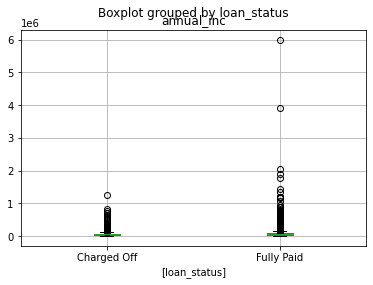

In [77]:
## Lets check annual income of the applicants
loan_ai = loan[['loan_status', 'annual_inc']]
boxplot = loan_ai.boxplot(by='loan_status')

In [78]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### There are couple of outliers in the annual income. Since those are for Fully Paid category.. it does not matter much. Lets remove those.

In [79]:
loan['annual_inc'].describe(percentiles=(.95,.96,.97,.98,.99))

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
50%      5.886800e+04
95%      1.400040e+05
96%      1.500000e+05
97%      1.650000e+05
98%      1.870000e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [80]:
## Lets remove above 99.995 percentile.
loan[loan.annual_inc > loan.annual_inc.quantile(.99995)][['loan_status', 'annual_inc', 'funded_amnt']]


,loan_status,annual_inc,funded_amnt
29639,Fully Paid,3900000,15500
30107,Fully Paid,6000000,5000


In [81]:
loan = loan[loan.annual_inc < loan.annual_inc.quantile(.99995)]

In [82]:
len(loan)

38575

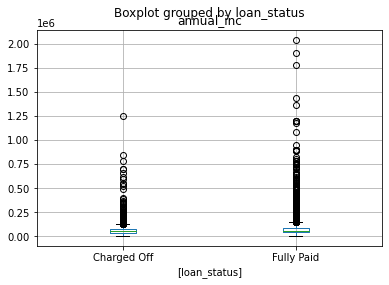

In [83]:
loan_ai = loan[['loan_status', 'annual_inc']]
boxplot = loan_ai.boxplot(by='loan_status')

In [84]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38575 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38575 non-null  int64  
 1   funded_amnt                 38575 non-null  int64  
 2   funded_amnt_inv             38575 non-null  float64
 3   term                        38575 non-null  object 
 4   int_rate                    38575 non-null  float64
 5   installment                 38575 non-null  float64
 6   grade                       38575 non-null  object 
 7   sub_grade                   38575 non-null  object 
 8   emp_title                   36189 non-null  object 
 9   emp_length                  37542 non-null  object 
 10  home_ownership              38575 non-null  object 
 11  annual_inc                  38575 non-null  int64  
 12  verification_status         38575 non-null  object 
 13  issue_d                     385

In [85]:
loan['term'].describe()

count          38575
unique             2
top        36 months
freq           29095
Name: term, dtype: object

In [86]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [87]:
loan['term'] = loan['term'].apply(lambda x: 36 if (x == ' 36 months') else 60)

In [88]:
loan['term'].describe()

count    38575.000000
mean        41.898121
std         10.332949
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

In [89]:
loan['term'] = loan['term'].astype(np.int)

/var/folders/zv/4f_6jzdn08124jg7xpkc2fk80000gn/T/ipykernel_5634/2192088368.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loan['term'] = loan['term'].astype(np.int)


In [90]:
type(loan['term'][0])

numpy.int64

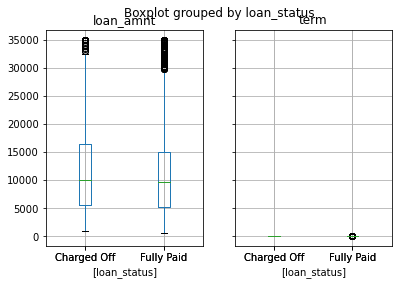

In [91]:
loan_at = loan[['loan_status', 'term', 'loan_amnt']]
boxplot = loan_at.boxplot(by='loan_status')

In [92]:
loan_at.groupby(by=['term', 'loan_status']).count()

loan_amnt
term loan_status           
36   Charged Off       3227
     Fully Paid       25868
60   Charged Off       2400
     Fully Paid        7080

In [93]:
loan.rename(columns={'term':'term_months'},inplace=True)

### Looking at the term, for higher term loans, the %ge of defaulters is much higher.
- For 36 months, it is 11.09%
- For 60 months, it is 25.32%

In [94]:
loan[loan['defaulted'] == 1]['funded_amnt'].describe(percentiles=(.75,.8,.85,.9,.95))

count     5627.000000
mean     11753.398792
std       7760.516335
min        900.000000
50%      10000.000000
75%      16000.000000
80%      18000.000000
85%      20000.000000
90%      24000.000000
95%      25000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [95]:
loan[loan['defaulted'] == 0]['funded_amnt'].describe(percentiles=(.75,.8,.85,.9,.95))

count    32948.000000
mean     10618.542855
std       6956.138158
min        500.000000
50%       9200.000000
75%      14500.000000
80%      15100.000000
85%      18000.000000
90%      20000.000000
95%      25000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [96]:
loan[loan['defaulted'] == 1]['annual_inc'].describe(percentiles=(.75,.8,.85,.9,.95))

count    5.627000e+03
mean     6.242729e+04
std      4.777601e+04
min      4.080000e+03
50%      5.300000e+04
75%      7.500000e+04
80%      8.000000e+04
85%      9.000000e+04
90%      1.030200e+05
95%      1.296972e+05
max      1.250000e+06
Name: annual_inc, dtype: float64

In [97]:
loan[loan['defaulted'] == 0]['annual_inc'].describe(percentiles=(.75,.8,.85,.9,.95))

count    3.294800e+04
mean     6.956626e+04
std      5.401933e+04
min      4.000000e+03
50%      6.000000e+04
75%      8.400000e+04
80%      9.100000e+04
85%      1.000000e+05
90%      1.180000e+05
95%      1.440000e+05
max      2.039784e+06
Name: annual_inc, dtype: float64

In [98]:
loan['grade'].describe()

count     38575
unique        7
top           B
freq      11674
Name: grade, dtype: object

In [99]:
loan['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [100]:
loan['sub_grade'].describe()

count     38575
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object

In [101]:
loan['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [102]:
loan['issue_d'].describe()

count      38575
unique        55
top       Nov-11
freq        2062
Name: issue_d, dtype: object

In [103]:
loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [104]:
## issue_d is following uniform format. We can extract month and year from this
loan['issue_year'] = loan['issue_d'].apply(lambda x:x.split('-')[1])

In [105]:
loan['issue_year'] = loan['issue_year'].apply(lambda x : 2000+int(x))

In [106]:
loan['issue_year'].describe()

count    38575.000000
mean      2010.309086
std          0.882678
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_year, dtype: float64

In [107]:
loan['issue_month'] = loan['issue_d'].apply(lambda x:x.split('-')[0])

In [108]:
loan['issue_month'].describe()

count     38575
unique       12
top         Dec
freq       4215
Name: issue_month, dtype: object

In [109]:
loan['issue_month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [110]:
loan.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,defaulted,issue_year,issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,0.0,1,0,0.0,0,0.0,0.0,1,2011,Dec
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec


#### The following data attributes are representing customer behaviour data. Since the dataset is all about approved loan applications and no helpful info can be derived redarding defaulters.
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',

Lets drop these

In [111]:
del loan['delinq_2yrs']
del loan['earliest_cr_line']
del loan['inq_last_6mths']
del loan['open_acc']
del loan['pub_rec']
del loan['revol_bal']
del loan['revol_util']
del loan['total_acc']
del loan['out_prncp']
del loan['out_prncp_inv']
del loan['total_pymnt']
del loan['total_pymnt_inv']
del loan['total_rec_prncp']
del loan['total_rec_int']
del loan['total_rec_late_fee']
del loan['recoveries']
del loan['collection_recovery_fee']
del loan['last_pymnt_d']
del loan['last_pymnt_amnt']
del loan['last_credit_pull_d']

In [112]:
len(loan.columns)

33

In [113]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,defaulted,issue_year,issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,0.0,1,0,0.0,0,0.0,0.0,1,2011,Dec
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,1,0,0.0,0,0.0,0.0,0,2011,Dec


In [114]:
loan['tax_liens'].unique()

array([ 0., nan])

In [115]:
## tax_liens is not useful
del loan['tax_liens']

In [116]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [117]:
loan['delinq_amnt'].describe()

count    38575.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64

In [118]:
## delinq_amnt is not useful
del loan['delinq_amnt']

In [119]:
len(loan.columns)

31

In [120]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'defaulted',
       'issue_year', 'issue_month'],
      dtype='object')

In [121]:
loan['policy_code'].describe()

count    38575.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [122]:
loan['policy_code'].unique()

array([1])

In [123]:
## policy_code is not useful
del loan['policy_code']

In [124]:
loan['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [125]:
loan['url'].unique()

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       ...,
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90395',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90376',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=87023'],
      dtype=object)

In [126]:
## url is not useful
del loan['url']

In [127]:
loan['dti'].describe()

count    38575.000000
mean        13.273410
std          6.672544
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [128]:
loan['pymnt_plan'].describe()

count     38575
unique        1
top           n
freq      38575
Name: pymnt_plan, dtype: object

In [129]:
loan['pymnt_plan'].unique()

array(['n'], dtype=object)

In [130]:
## pymnt_plan is not useful
del loan['pymnt_plan']

In [131]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'initial_list_status', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
       'defaulted', 'issue_year', 'issue_month'],
      dtype='object')

In [132]:
loan['acc_now_delinq'].describe()

count    38575.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [133]:
## acc_now_delinq is not useful
del loan['acc_now_delinq']

In [134]:
loan['title'].describe()

count                  38564
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

In [135]:
loan['initial_list_status'].unique()

array(['f'], dtype=object)

In [136]:
## initial_list_status is not useful
del loan['initial_list_status']

In [137]:
loan['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [138]:
loan['installment'].describe()

count    38575.000000
mean       322.470025
std        208.643129
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [139]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'defaulted', 'issue_year', 'issue_month'],
      dtype='object')

In [140]:
loan[['grade', 'sub_grade', 'defaulted']].groupby(by=['grade', 'sub_grade']).sum()

defaulted
grade sub_grade           
A     A1                30
      A2                74
      A3               103
      A4               178
      A5               217
B     B1               171
      B2               228
      B3               341
      B4               329
      B5               356
C     C1               336
      C2               321
      C3               270
      C4               212
      C5               208
D     D1               167
      D2               271
      D3               256
      D4               215
      D5               209
E     E1               198
      E2               163
      E3               119
      E4               126
      E5               109
F     F1                91
      F2                70
      F3                51
      F4                53
      F5                54
G     G1                31
      G2                28
      G3                19
      G4                13
      G5                10

In [141]:
loan[['grade', 'defaulted']].groupby(by='grade').sum()

,defaulted
grade,
A,602
B,1425
C,1347
D,1118
E,715
F,319
G,101


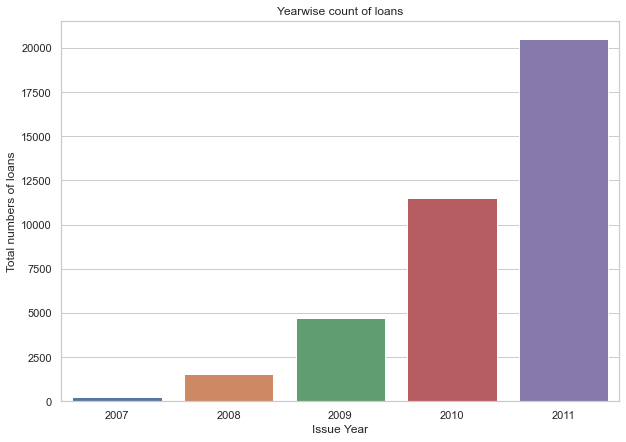

In [142]:
#Countplot to show the year wise distribution of loans
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='issue_year',data=loan)
years = sorted(loan['issue_year'].unique())
xpos=np.arange(len(years))
ax.set(xlabel='Issue Year', ylabel='Total numbers of loans',title='Yearwise count of loans')
plt.xticks(xpos,years)
plt.show()

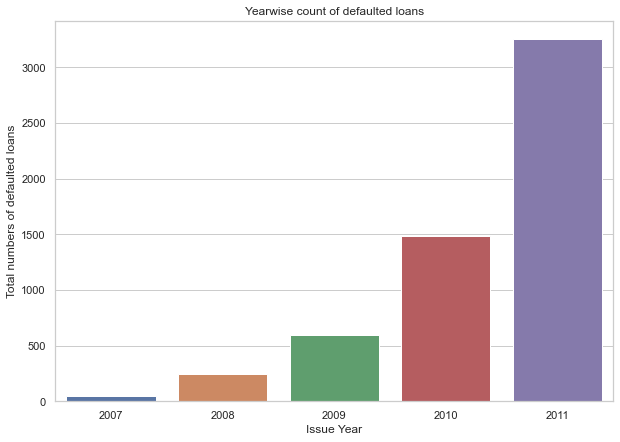

In [143]:
#Countplot to show the year wise distribution of defaulted loans
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='issue_year',data=loan[loan['defaulted'] == 1])
years = sorted(loan['issue_year'].unique())
xpos=np.arange(len(years))
ax.set(xlabel='Issue Year', ylabel='Total numbers of defaulted loans',title='Yearwise count of defaulted loans')
plt.xticks(xpos,years)
plt.show()

### We can see that in year 2011 maximum number of loans were issued, and the number of defaulters also is the highest in the same year
### Fact : Number of defaulters increases as number of issued loans increase.

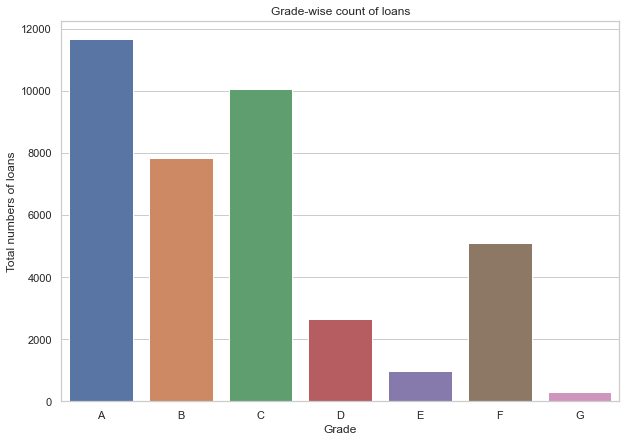

In [144]:
#Countplot to show the grade wise distribution of loans
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='grade',data=loan)
grades = sorted(loan['grade'].unique())
xpos=np.arange(len(grades))
ax.set(xlabel='Grade', ylabel='Total numbers of loans',title='Grade-wise count of loans')
plt.xticks(xpos,grades)
plt.show()

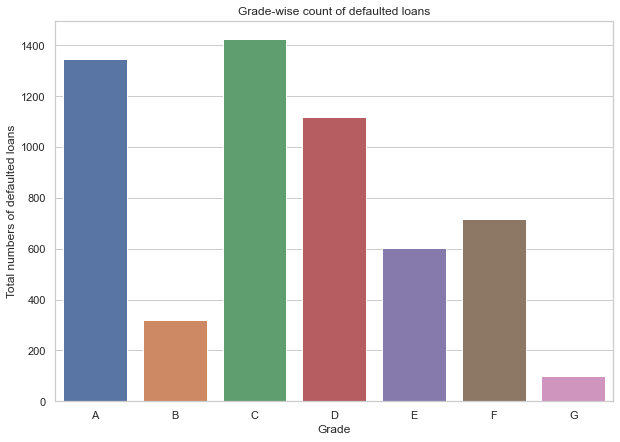

In [145]:
#Countplot to show the grade wise distribution of defaulted loans
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='grade',data=loan[loan['defaulted'] == 1])
grades = sorted(loan['grade'].unique())
xpos=np.arange(len(grades))
ax.set(xlabel='Grade', ylabel='Total numbers of defaulted loans',title='Grade-wise count of defaulted loans')
plt.xticks(xpos,grades)
plt.show()

### Maximum number of loans were issued for the A grade catogory. But the maximum number of defaulters were from the C grade category

### Fact : The %ge of defaulters were highest for grade categories C, D. E and F

In [146]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

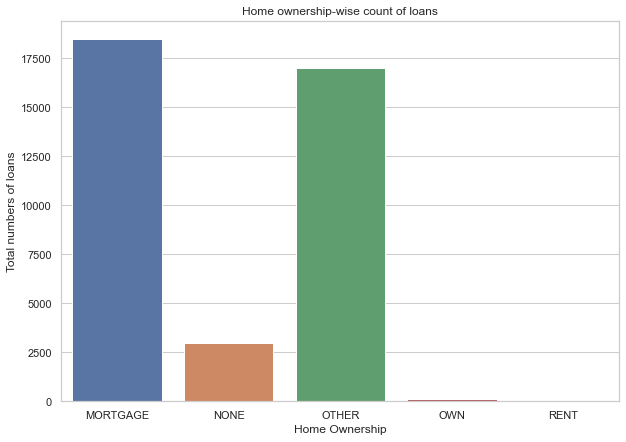

In [147]:
#Countplot to show the grade wise distribution of loans
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='home_ownership',data=loan)
home_owners = sorted(loan['home_ownership'].unique())
xpos=np.arange(len(home_owners))
ax.set(xlabel='Home Ownership', ylabel='Total numbers of loans',title='Home ownership-wise count of loans')
plt.xticks(xpos,home_owners)
plt.show()

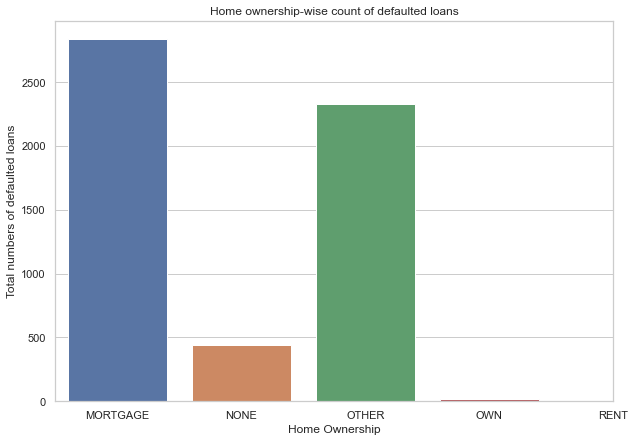

In [148]:
#Countplot to show the grade wise distribution of loans
plt.figure(figsize=(10,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='home_ownership',data=loan[loan['defaulted'] == 1])
home_owners = sorted(loan['home_ownership'].unique())
xpos=np.arange(len(home_owners))
ax.set(xlabel='Home Ownership', ylabel='Total numbers of defaulted loans',title='Home ownership-wise count of defaulted loans')
plt.xticks(xpos,home_owners)
plt.show()

### People with mortgage have defaulted the loan most. But we cannot say that is definite becaue maximum number of loans were issued for people with mortage, and as the number of loan increase, the defaulters also increase.

### We better check it by %ges to bet a better idea.

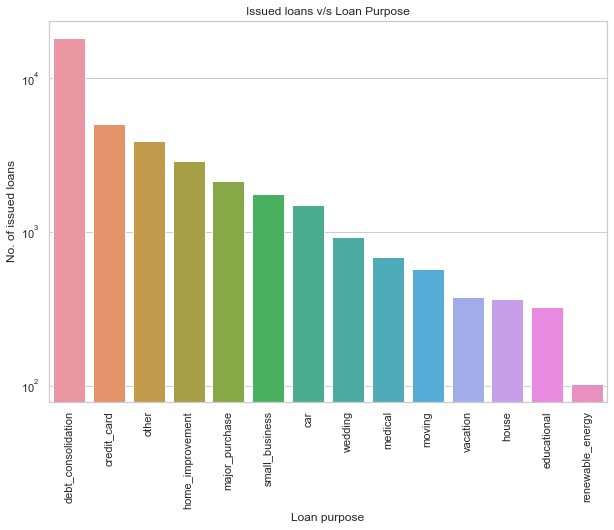

In [149]:
#Logarathemic Count plot for loans issued to show the distribution on loan purpose
plt.figure(figsize=(10,7))
ax = sb.countplot(x='purpose',data=loan,order=loan['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of issued loans',title='Issued loans v/s Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

### Maximum number of loans were issued for loan purpose Debt Consolidation, followed Credit Card, Other, Home Improvement, Major Purchase etc.

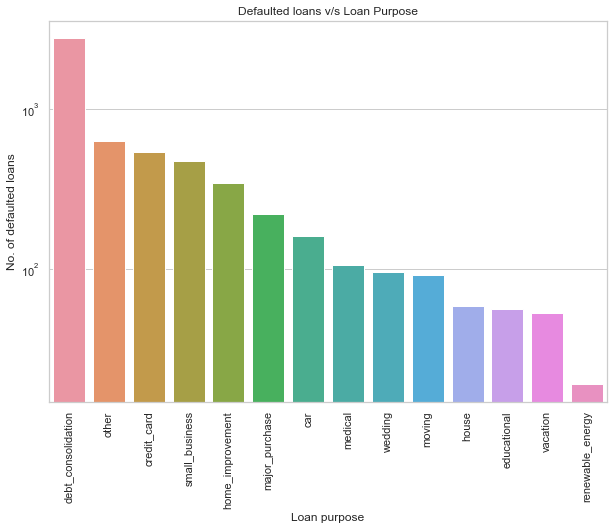

In [150]:
#Logarathemic Count plot for loans defaulted to show the distribution on loan purpose
plt.figure(figsize=(10,7))
ax = sb.countplot(x='purpose',data=loan[loan['defaulted'] == 1],order=loan[loan['defaulted'] == 1]['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of defaulted loans',title='Defaulted loans v/s Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### Number of defaulted loans is maximum for the loans issued for purspose "Debt Consolidation"

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


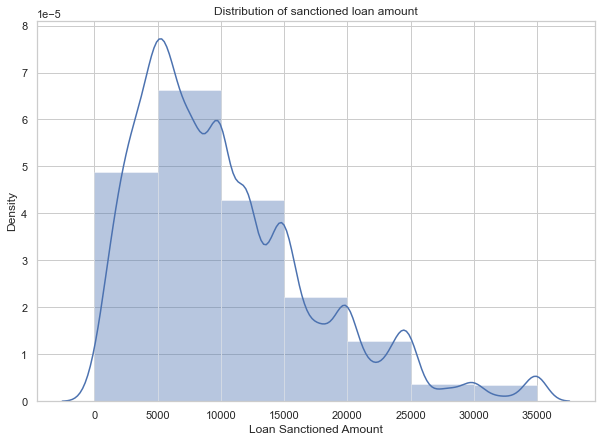

In [151]:
## Lets look at the loan approved amount distribution
## funded_amnt_inv is the actual amount sanctioned.
plt.figure(figsize=(10,7))
ax=sb.distplot(loan['funded_amnt_inv'],bins=7,color='b')
ax.set(xlabel='Loan Sanctioned Amount',title='Distribution of sanctioned loan amount')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


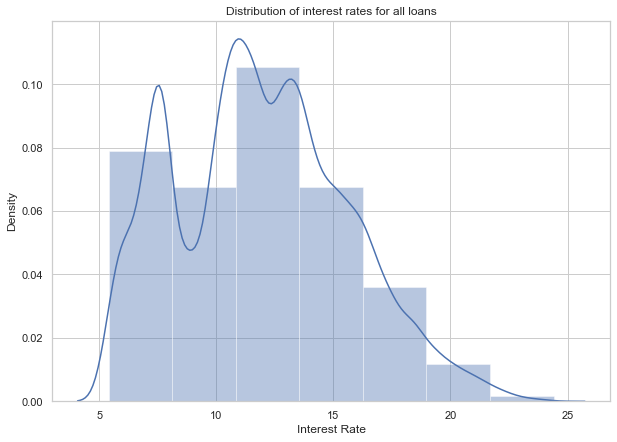

In [181]:
plt.figure(figsize=(10,7))
ax=sb.distplot(loan['int_rate'],bins=7,color='b')
ax.set(xlabel='Interest Rate',title='Distribution of interest rates for all loans')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


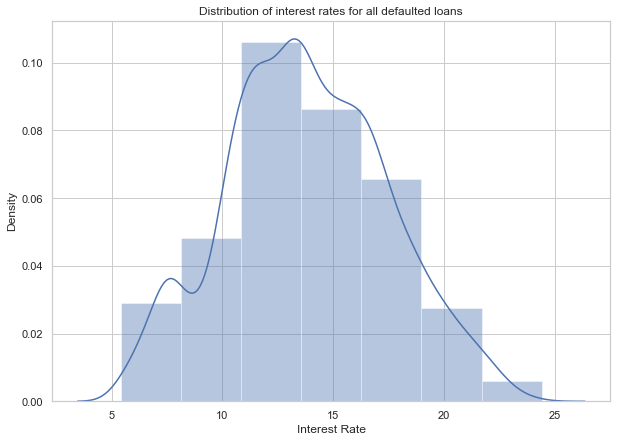

In [182]:
plt.figure(figsize=(10,7))
ax=sb.distplot(loan[loan['defaulted'] == 1]['int_rate'],bins=7,color='b')
ax.set(xlabel='Interest Rate',title='Distribution of interest rates for all defaulted loans')
plt.show()

### We can see that 5000-10000 was most frequent followed by 0-5000
#### This is in dollars

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


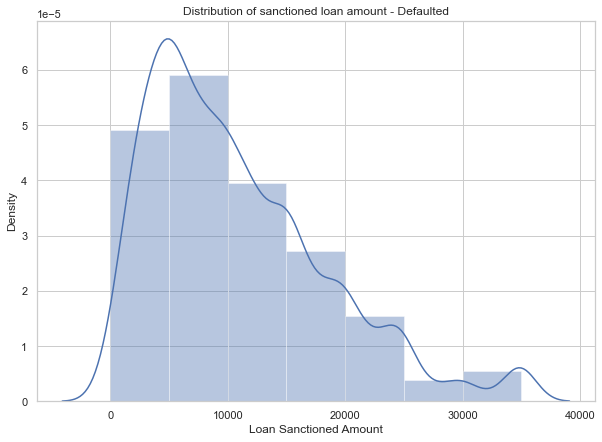

In [152]:
## Lets look at defaulted loans now.
## funded_amnt_inv is the actual amount sanctioned.
plt.figure(figsize=(10,7))
ax=sb.distplot(loan[loan['defaulted'] == 1]['funded_amnt_inv'],bins=7,color='b')
ax.set(xlabel='Loan Sanctioned Amount',title='Distribution of sanctioned loan amount - Defaulted')
plt.show()

#### Most of defauters were issued loans in range 5000-10000

In [153]:
# Lets look at the diffence between loan applied and loan approved
loan['loan_amount_not_inv'] = loan['loan_amnt'] - loan['funded_amnt_inv']

In [154]:
loan['loan_amount_not_inv'].describe()

count    38575.000000
mean       824.235274
std       2551.353415
min          0.000000
25%          0.000000
50%          6.003618
75%        225.000000
max      32474.996081
Name: loan_amount_not_inv, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


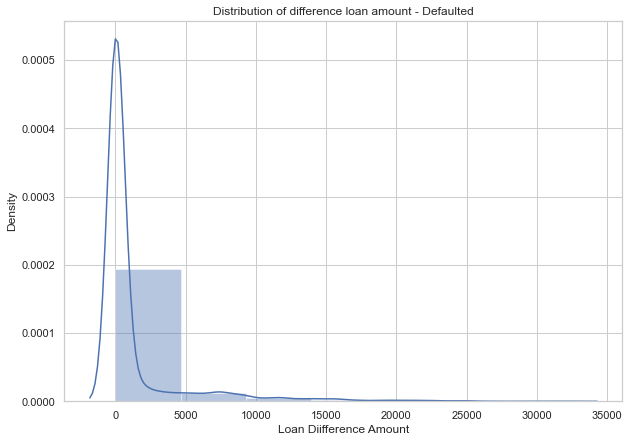

In [155]:
## Lets look at defaulted loans now for loan_amount_not_inv
## loan_amount_not_inv is the diff b/w loan applied and loan approved.
plt.figure(figsize=(10,7))
ax=sb.distplot(loan[loan['defaulted'] == 1]['loan_amount_not_inv'],bins=7,color='b')
ax.set(xlabel='Loan Diifference Amount',title='Distribution of difference loan amount - Defaulted')
plt.show()

#### We can see that defaulters were max when the applied loan amount approved fully.

In [156]:
## Lets analyse the defaulters data set
loan_defaulters = loan[loan['defaulted'] == 1]

In [157]:
#Calculate the percentage of loan defaulters grouped by grade
grade_perc=pd.DataFrame(data=round((100*loan_defaulters['grade'].value_counts())/loan['grade'].value_counts(),2))
grade_perc.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_perc

,defaulter_perc
A,5.99
B,12.21
C,17.20
D,21.99
E,26.85
F,32.68
G,33.78


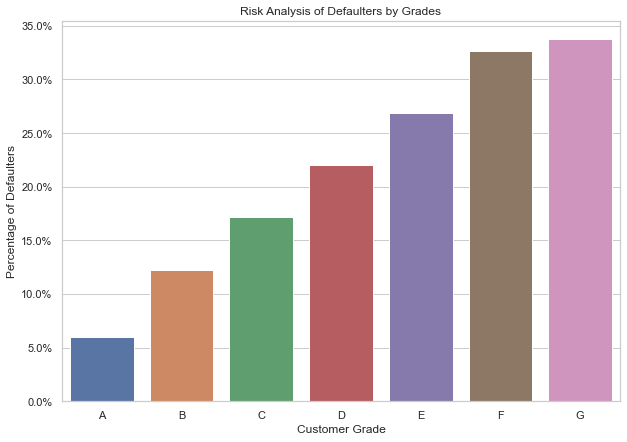

In [158]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,7))
ax=sb.barplot(x=grade_perc.index,y='defaulter_perc',data=grade_perc)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### G category has the maximum %ge of defaulters, followed by F category

In [159]:
#Calculate the percentage of loan defaulters by loan purpose
loan_purpose_sub = pd.DataFrame(data=round((100*loan_defaulters['purpose'].value_counts())/loan['purpose'].value_counts(),2))
loan_purpose_sub.rename(columns={'purpose':'defaulter_perc'},inplace=True)
loan_purpose_sub.sort_values(by='defaulter_perc',ascending=False,inplace=True)
loan_purpose_sub

,defaulter_perc
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.08


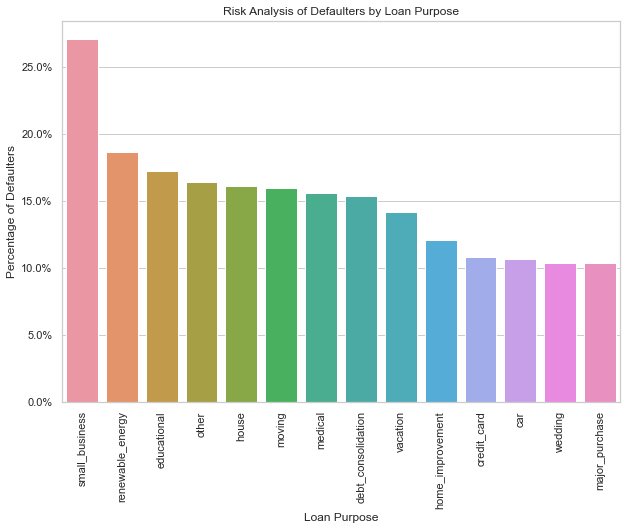

In [160]:
plt.figure(figsize=(10,7))
ax=sb.barplot(x=loan_purpose_sub.index,y='defaulter_perc',data=loan_purpose_sub)
ax.set(xlabel='Loan Purpose', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by Loan Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

### Small Business category has the maximum %ge of defaulters, followed by Renewable Energy category

In [161]:
#Analyse the empact employee job duration
job_experience_perc = pd.DataFrame(data=round((100*loan_defaulters['emp_length'].value_counts())/loan['emp_length'].value_counts(),2))
job_experience_perc.rename(columns={'emp_length':'defaulter_perc'},inplace=True)
job_experience_perc.sort_values(by='defaulter_perc',ascending=False,inplace=True)
job_experience_perc

,defaulter_perc
10+ years,15.68
7 years,15.37
1 year,14.39
5 years,14.34
< 1 year,14.17
6 years,14.16
8 years,14.15
3 years,13.84
4 years,13.82
2 years,13.21


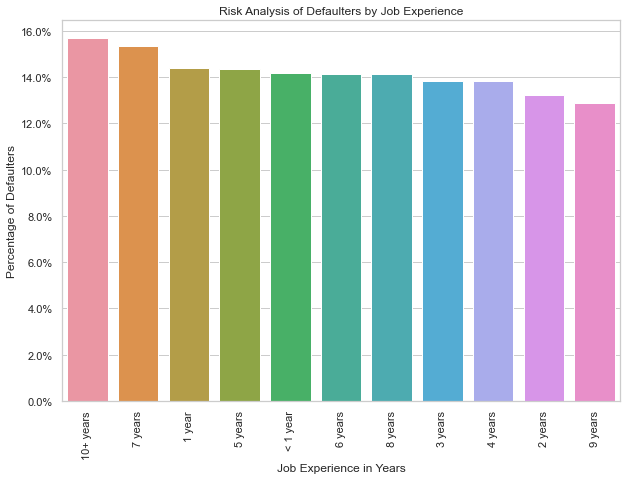

In [162]:
plt.figure(figsize=(10,7))
ax=sb.barplot(x=job_experience_perc.index,y='defaulter_perc',data=job_experience_perc)
ax.set(xlabel='Job Experience in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by Job Experience')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

#### Looks like 10+ years experienced customers are the most of the defaulters

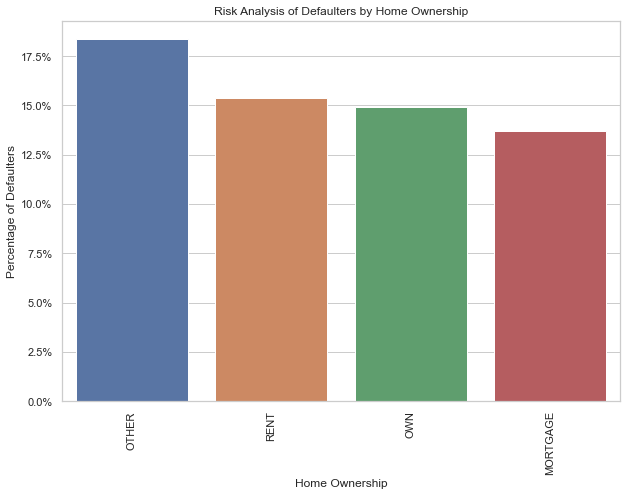

In [163]:
# Analyze home ownership
home_perc = pd.DataFrame(data=round((100*loan_defaulters['home_ownership'].value_counts())/loan['home_ownership'].value_counts(),2))
home_perc.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home_perc.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_perc.dropna(inplace=True)

plt.figure(figsize=(10,7))
ax=sb.barplot(x=home_perc.index,y='defaulter_perc',data=home_perc)
ax.set(xlabel='Home Ownership', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

### Home Ownership : Other category has maximum number of defaulters. It is less for the Mortgage category

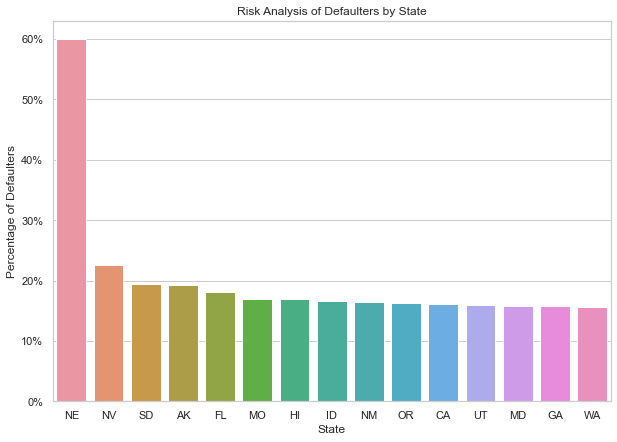

In [164]:
# Analyse the impact of state
state_perc = pd.DataFrame(data=round((100*loan_defaulters['addr_state'].value_counts())/loan['addr_state'].value_counts(),2))
state_perc.rename(columns={'addr_state':'defaulter_perc'},inplace=True)
state_perc.sort_values(by='defaulter_perc',ascending=False,inplace=True)
## Since it is a big list. Lets look at the first few.
state_perc_top = state_perc.head(15)

plt.figure(figsize=(10,7))
ax=sb.barplot(x=state_perc_top.index,y='defaulter_perc',data=state_perc_top)
ax.set(xlabel='State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by State')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### The state NE has a big spike on the number of defaulters.

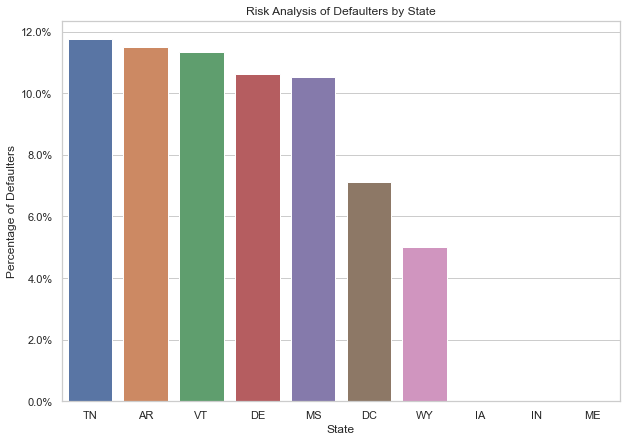

In [165]:
state_perc_tail = state_perc.tail(10)

plt.figure(figsize=(10,7))
ax=sb.barplot(x=state_perc_tail.index,y='defaulter_perc',data=state_perc_tail)
ax.set(xlabel='State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by State')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### The states IA, IN, ME have NO defaulters.

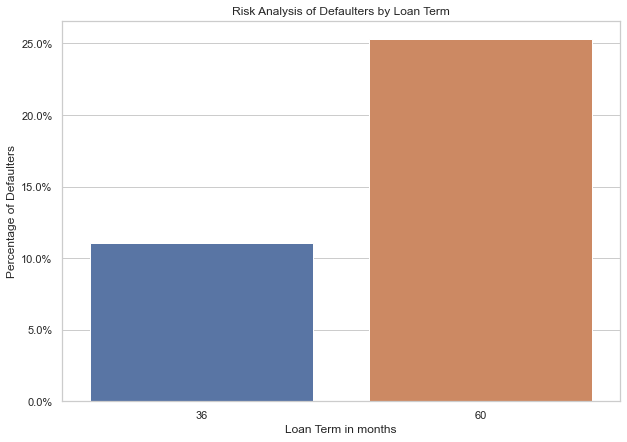

In [166]:
# Analyse the impact of loan term
term_perc = pd.DataFrame(data=round((100*loan_defaulters['term_months'].value_counts())/loan['term_months'].value_counts(),2))
term_perc.rename(columns={'term_months':'defaulter_perc'},inplace=True)
term_perc.sort_values(by='defaulter_perc',ascending=False,inplace=True)

plt.figure(figsize=(10,7))
ax=sb.barplot(x=term_perc.index,y='defaulter_perc',data=term_perc)
ax.set(xlabel='Loan Term in months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters by Loan Term')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### When loan term is 60 months, we have the maximum number of defaulters

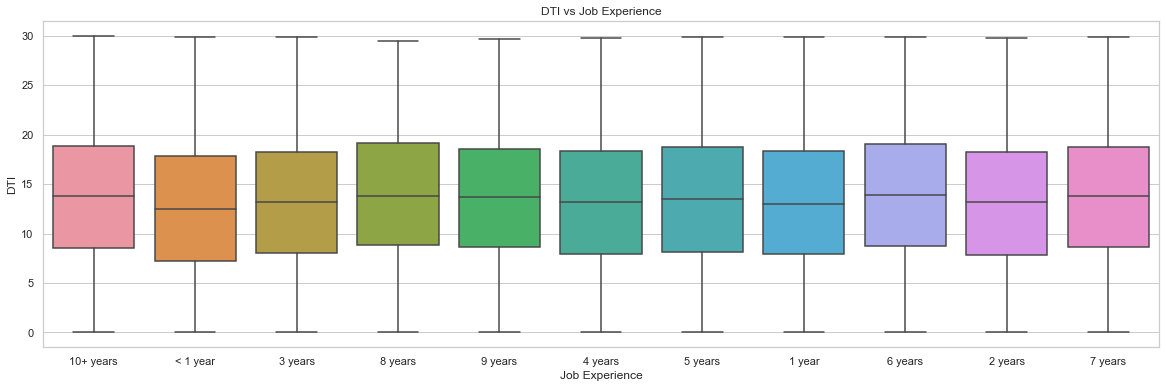

In [167]:
plt.figure(figsize=(20,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan)
ax.set(xlabel='Job Experience', ylabel='DTI',title='DTI vs Job Experience')
plt.show()

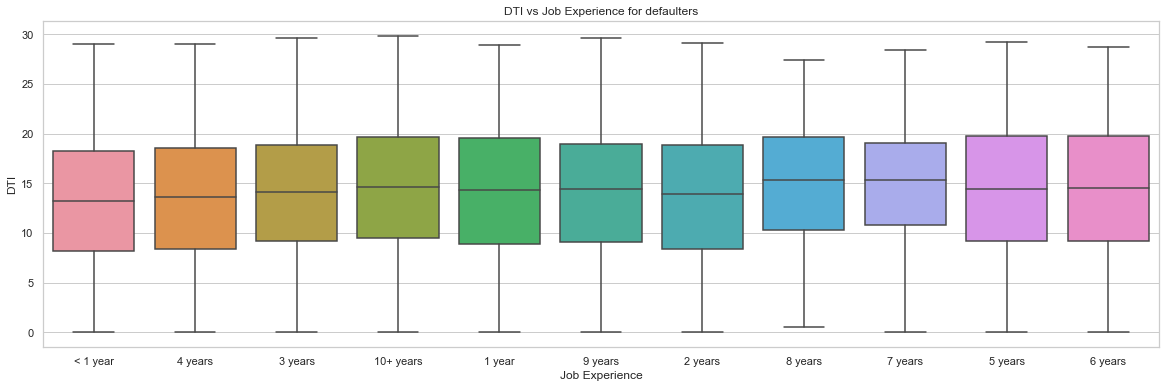

In [168]:
plt.figure(figsize=(20,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan_defaulters)
ax.set(xlabel='Job Experience', ylabel='DTI',title='DTI vs Job Experience for defaulters')
plt.show()

### BiVariate Analysis: when analyzing the DTI for loan defaulters v/s Job experience for the defaulters, for 7 and 8 years experienced customers have the highest DTI and "< 1 year" experienced customers have the lowest DTI.

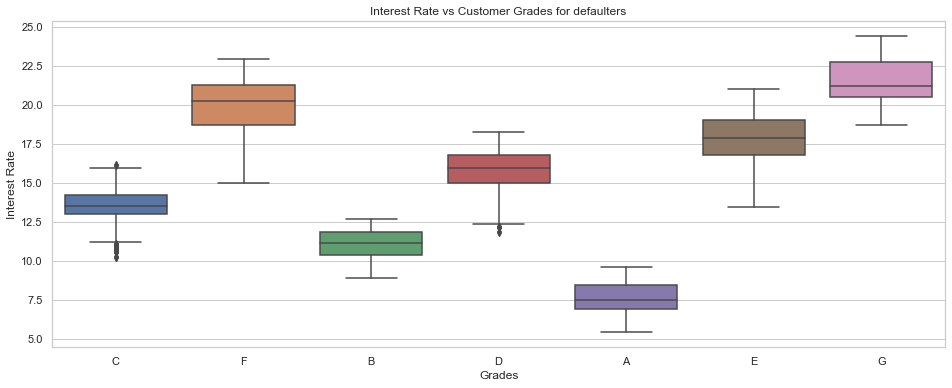

In [169]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='int_rate',data=loan_defaulters)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='Interest Rate vs Customer Grades for defaulters')
plt.show()

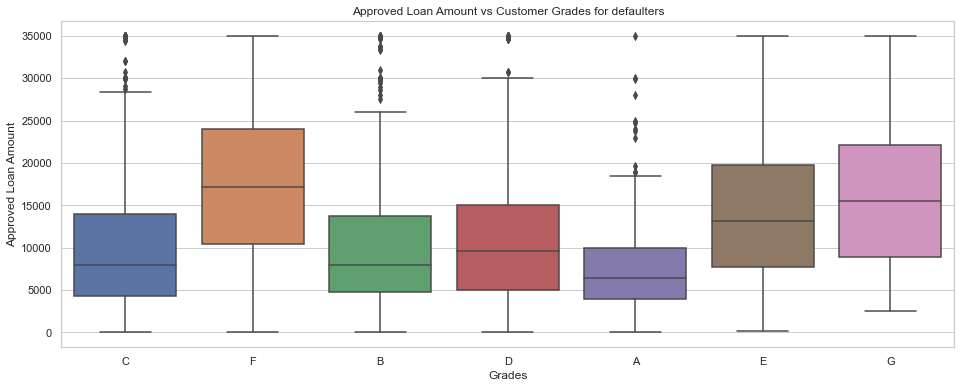

In [179]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='funded_amnt_inv',data=loan_defaulters)
ax.set(xlabel='Grades', ylabel='Approved Loan Amount',title='Approved Loan Amount vs Customer Grades for defaulters')
plt.show()

### G grade category has the highest interest rates, followed by F category. This can be read in connection with number of defaulters. It is highest of G category followed by F category. We can see a high correlation bewteen interest date and number of defaulters.

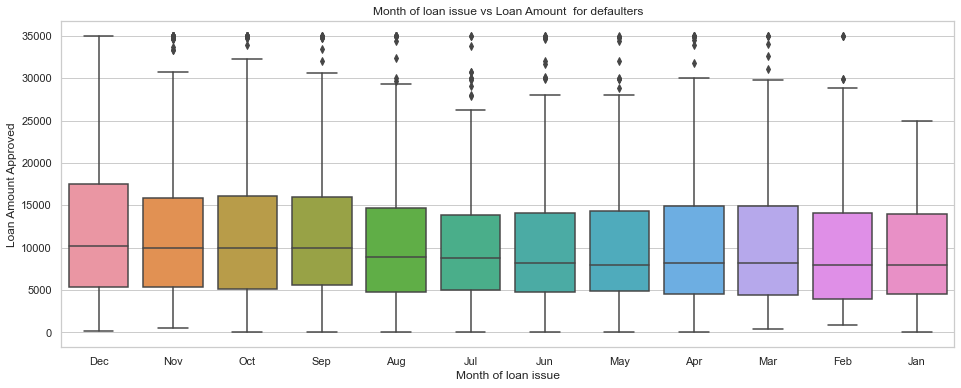

In [170]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='issue_month',y='funded_amnt_inv',data=loan_defaulters)
ax.set(xlabel='Month of loan issue', ylabel='Loan Amount Approved',title='Month of loan issue vs Loan Amount  for defaulters')
plt.show()

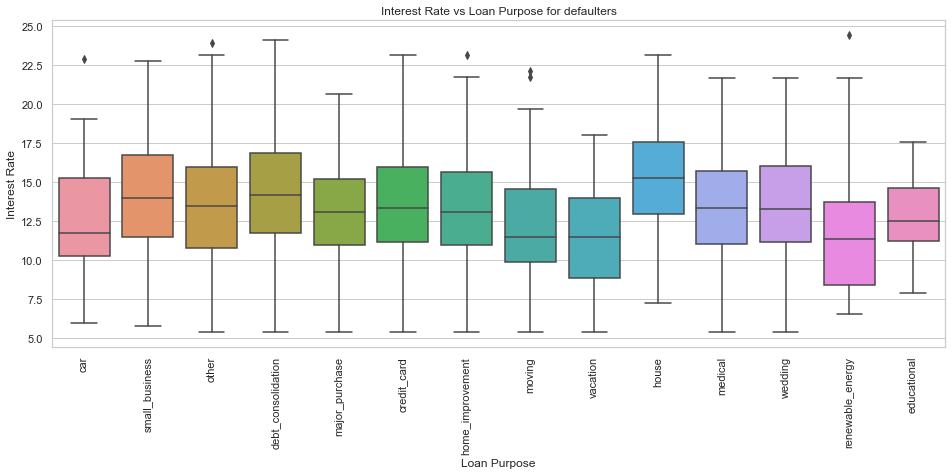

In [184]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='purpose',y='int_rate',data=loan_defaulters)
ax.set(xlabel='Loan Purpose', ylabel='Interest Rate',title='Interest Rate vs Loan Purpose for defaulters')
plt.xticks(rotation=90)
plt.show()

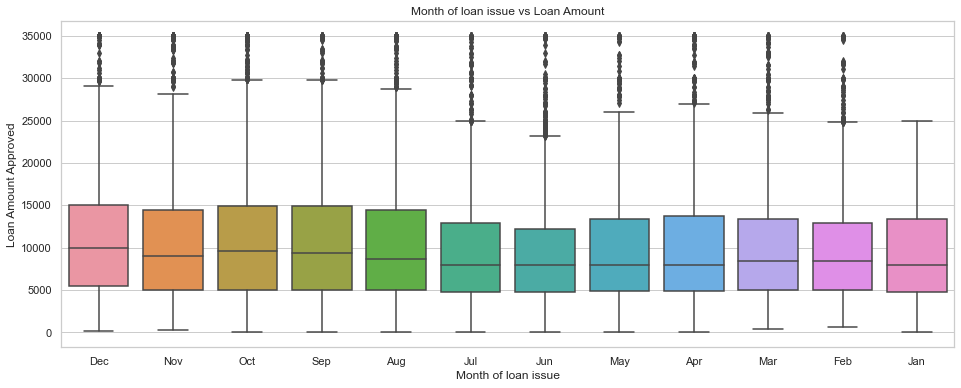

In [171]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='issue_month',y='funded_amnt_inv',data=loan)
ax.set(xlabel='Month of loan issue', ylabel='Loan Amount Approved',title='Month of loan issue vs Loan Amount')
plt.show()

### We can see that higher loans issued in December have been defaulted.

In [172]:
loan_defaulters.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'defaulted', 'issue_year', 'issue_month',
       'loan_amount_not_inv'],
      dtype='object')

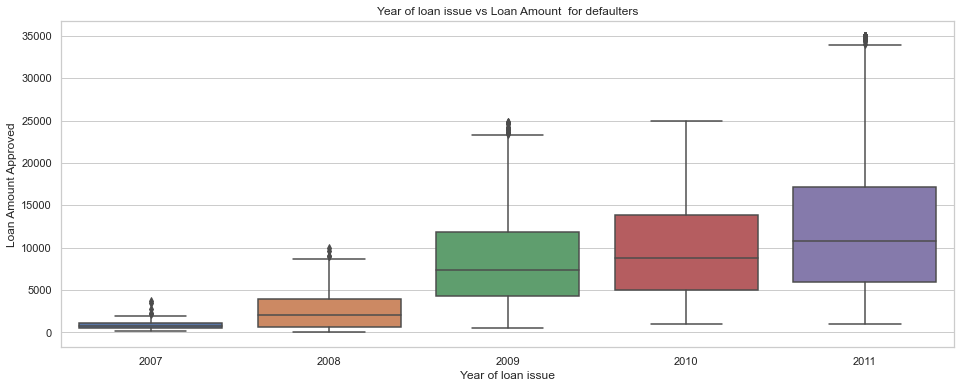

In [173]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='issue_year',y='funded_amnt_inv',data=loan_defaulters)
ax.set(xlabel='Year of loan issue', ylabel='Loan Amount Approved',title='Year of loan issue vs Loan Amount  for defaulters')
plt.show()

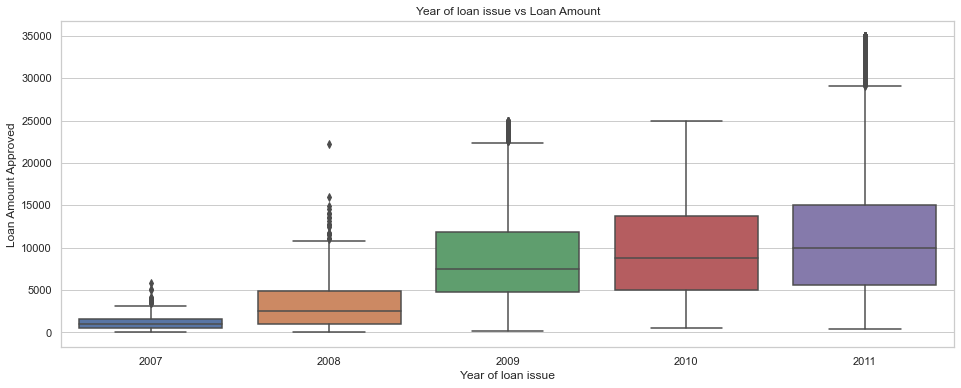

In [174]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='issue_year',y='funded_amnt_inv',data=loan)
ax.set(xlabel='Year of loan issue', ylabel='Loan Amount Approved',title='Year of loan issue vs Loan Amount')
plt.show()

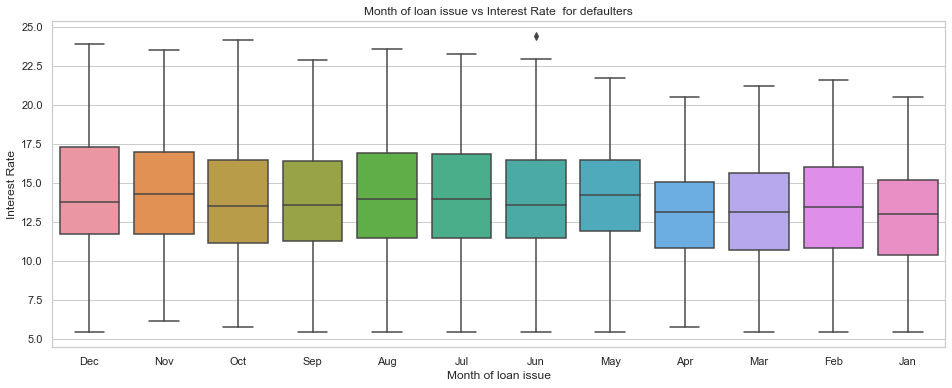

In [175]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='issue_month',y='int_rate',data=loan_defaulters)
ax.set(xlabel='Month of loan issue', ylabel='Interest Rate',title='Month of loan issue vs Interest Rate  for defaulters')
plt.show()

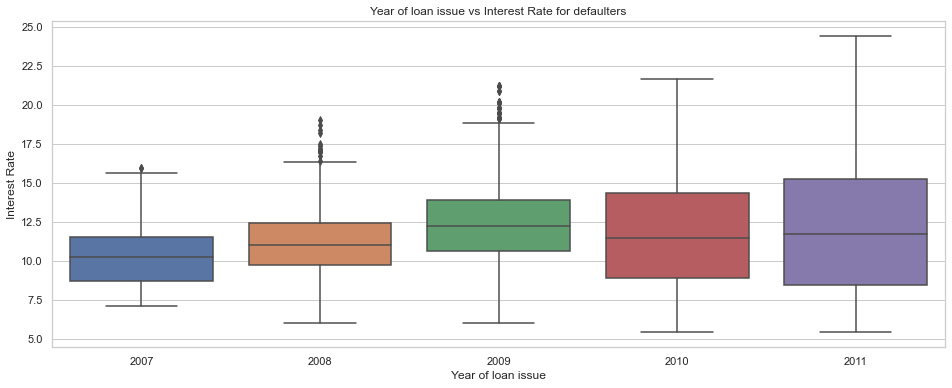

In [176]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='issue_year',y='int_rate',data=loan)
ax.set(xlabel='Year of loan issue', ylabel='Interest Rate',title='Year of loan issue vs Interest Rate for defaulters')
plt.show()

### Analyzing year wise data and month wise data, we can see that higer interests rates cause more defaulters. Whereas lower interest dates have less defaulters